In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sts
import scipy.optimize as opt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [13]:
np.random.seed(1337)
x = np.linspace(-10, 10, 500)
y = 0.5 * x + 1 + sts.norm(0, sqrt(0.2)).rvs(500)

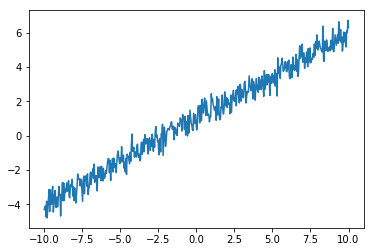

In [14]:
plt.plot(x, y)
plt.show()

In [15]:
def MSE((k, b)):
    return ((k * x + b - y) ** 2.).mean()

In [16]:
w = opt.minimize(MSE, x0=(0., 0.)).x

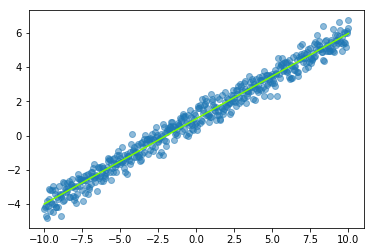

In [17]:
plt.scatter(x, y, alpha=0.5)
plt.plot(x, w[0] * x + w[1], color='lawngreen')
plt.show()

In [18]:
np.random.seed(1337)
x = np.append(x, x[::7])
y = np.append(y, -1. + sts.norm(0, sqrt(0.2)).rvs(72))

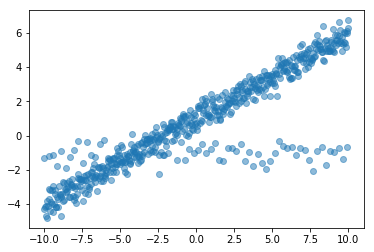

In [19]:
plt.scatter(x, y, alpha=0.5)
plt.show()

In [24]:
w1 = opt.minimize(MSE, x0=(0., 0.)).x
w11 = opt.minimize(MSE, x0=(-25., 41.)).x
w12 = opt.minimize(MSE, x0=(13., 37.)).x
w13 = opt.minimize(MSE, x0=(18., -42.)).x

Убедимся, что мы попадаем в минимум независимо от начального положения (функция ошибки выпукла)

In [25]:
print w1,w11,w12,w13

[ 0.43532885  0.72807824] [ 0.43532885  0.72807823] [ 0.43532886  0.72807818] [ 0.43532885  0.72807827]


In [21]:
def MAE((k, b)):
    return (np.abs(k * x + b - y)).mean()

In [26]:
w2 = opt.minimize(MAE, x0=(0., 0.)).x
w21 = opt.minimize(MSE, x0=(-113., 72.)).x
w22 = opt.minimize(MSE, x0=(64., 11.)).x
w23 = opt.minimize(MSE, x0=(98., -51.)).x

Проверим, что не окажемся в локальном минимуме или не произойдет еще что плохое (функция уже даже не дифференцируема)

In [29]:
print w1,w11,w12,w13

[ 0.43532885  0.72807824] [ 0.43532885  0.72807823] [ 0.43532886  0.72807818] [ 0.43532885  0.72807827]


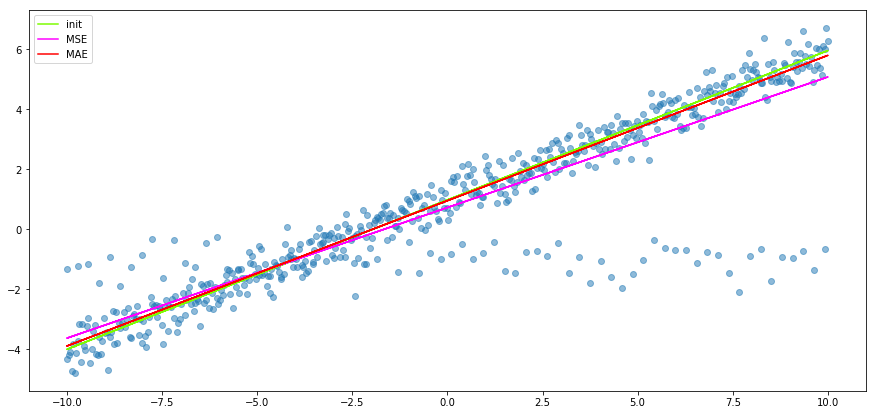

In [23]:
plt.figure(figsize=(15,7))
plt.scatter(x, y, alpha=0.5)
plt.plot(x, w[0] * x + w[1], color='lawngreen', label='init')
plt.plot(x, w1[0] * x + w1[1], color='magenta', label='MSE')
plt.plot(x, w2[0] * x + w2[1], color='red', label='MAE')
plt.legend(loc='best')
plt.show()

# Вывод

Рассмотрим при фиксированных $y_i$ выражение (к $x$ добавили искуственную единицу для свободного члена):$\sum\limits_{i}|wx-y_i|$
и пусть $wx$ пробегает значения от $-\infty$ до $+\infty$.
Тогда соответствующие модули сначала все идут с минусами, а потом последовательно раскрываются с плюсом при переходе через $y_i$ (перенумеруем соответственно вариационному ряду). Тогда экстремум получается при переходе между центральными значениями $y_i$, т.е. в районе выборочной медианы. Таким образом, останется найти минимум линейной функции при ограничениях вида $y_m \leq wx \leq y_{m+1}$. А значит, что веса, получаемые моделью, зависят, по существу, только от медианы (и, быть может, ее соседних значений), т.е. можно испортить значения очень многих точек, оставив порядок неподвижным, что не поменяет ответ.

Для $MSE$ же такого сделать не выйдет, поскольку если увести любую точку на достаточное расстояние от искомой прямой, веса будут сильно меняться (зависимость получается и явно из МНК)

Из последнего графика очевидно, что $MSE$-оценка карает за выбросы сильнее, чем $MAE$.